#### Linearization of Non-Linear Functional Relationships

Non-linear regression models can often be transformed into linear ones by applying an appropriate function to the independent and/or dependent variables. This process is known as **linearization**.

Despite its name, linear regression can be used to fit non-linear data by transforming the input features or the output. For example, polynomial regression is considered a type of linear regression because the hypothesis function is linear _in the parameters_, even though it can fit non-linear relationships between the original input features and the output.

Let's consider the example of a quadratic function, which represents a polynomial of degree 2. The quadratic function can be written as:

$y = ax² + bx + c$

Despite y being a non-linear function of x, this equation can be viewed as a linear regression problem if we consider [x², x] as our features. 


In that case, our hypothesis function would look like this:

$h = w_2x^2 + w_1x + b$

Where:

$b$, $w_1$ and $w_2$ are the parameters we want to estimate,
x² and x are our input features.
In this case, although the relationship between y and x is non-linear, the relationship between y and the parameters $b$, $w_1$, $w_2$ is linear. That's why polynomial regression is considered a type of linear regression: the model is linear in its parameters.



### Linearization of a Polynomial relationship using Scikit-Learn
Here's a simple numerical example


Firstly, it's important to note that Scikit-learn's `LinearRegression` fits models of the form: 

$y = w_1*x_1 + w_2*x_2 + ... + w_n*x_n + b$

where $w_1, w_2, ..., w_n$ are the coefficients and $b$ (sometimes notated by $w_0$) is the intercept. 

In our case, since we have a quadratic model $y = w_2*x^2 + w_1*x + b$, we need to create a new feature that is $x^2$, then use $x$ and $x^2$ as features to fit the model. 

In this code, `PolynomialFeatures` is used to generate the $x^2$ feature, and then `LinearRegression` is used to fit the model. The estimated parameters $w_1$, $w_2$ and intercept $b$ ($w_0$) are then printed. The plot shows the data points (in blue) and the fitted quadratic curve (in red).

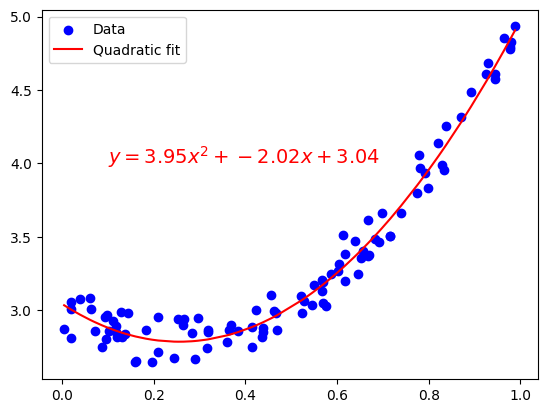

w1 = -2.0170121491097133, w2 = 3.9480174073166814, b = 3.0432172308851744


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create a sample dataset
np.random.seed(0)
x = np.sort(np.random.rand(100))
y = 4 * x**2 - 2 * x + 3 + np.random.randn(100) * 0.1

# Reshape x to be a 2D array of size (n_samples, n_features)
x = x.reshape(-1, 1)

# Use PolynomialFeatures to create x^2 as a new feature
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

# Fit a linear model
model = LinearRegression()
model.fit(x_poly, y)

# Plot the data and the model prediction
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, model.predict(x_poly), color='red', label='Quadratic fit')
plt.legend()
# add the curve equation based on the model coefficients
plt.text(0.1, 4, f"$y = {model.coef_[1]:.2f}x^2 + {model.coef_[0]:.2f}x + {model.intercept_:.2f}$", fontsize=14, color='red')
plt.show()

# The estimated parameters w1 and w2, and intercept b are
w1, w2 = model.coef_
b = model.intercept_
print(f"w1 = {w1}, w2 = {w2}, b = {b}")

### Linearization of an Exponetial Relationship

Consider the exponential growth model: 

$y = a * e^{b * x}$

Taking the natural logarithm (the inverse of an exponent) of both sides, we get: 

$ln(y) = b * x + ln(a)$

Reminder: $ln(a*e^{b*x})=ln(a)+ln(e^{b*x})=ln(a)+b*x$

We can represent this equation with the linear equation:

$y_t = w_1*x + w_0$

We can then apply linear regression on the transformed data to estimate the parameters $w_0$ and $w_1$. 

To get back the values of the original parameters, we can apply an exponent:
* $e^{ln(y)} = e^{w_1 * x + w_0}$ -> $y=e^{w_0}*e^{w_1*x}$ 
* ->    $a=e^{w_0}$
* ->    $b=w_1$

However, it's important to note a few caveats:

1. Not all non-linear models can be linearized. There needs to be an appropriate transformation that makes the relationship linear.

2. Applying a transformation changes the interpretation of the model's parameters and residuals. 

3. Transformations can distort error terms and thus violate the assumptions of linear regression (for example, homoscedasticity, which assumes that the variance of errors is the same across all levels of the independent variables).

4. The model assumes that the errors (residuals) of the transformed model follow a normal distribution, not the errors of the original model.

Here's an example of transforming the exponential model to a linear one:

In this code, `np.exp(model.intercept_)` estimates the parameter `a` and `model.coef_` estimates the parameter `b` in the original non-transformed model.

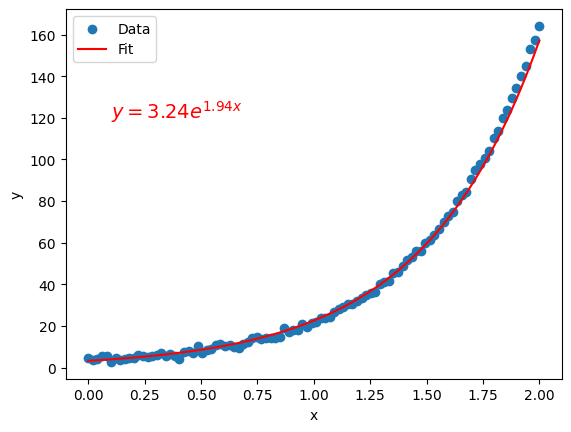

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(0)
x = np.linspace(0, 2, 100).reshape(-1, 1)
y = 3 * np.exp(2 * x) + np.random.randn(100, 1)

# Apply transformation
y_transformed = np.log(y)

# Fit the model to the transformed data
model = LinearRegression()
model.fit(x, y_transformed)

a = float(np.exp(model.intercept_))
b = float(model.coef_)

# Plot the data and the model prediction
plt.scatter(x, y, label='Data')
plt.plot(x, np.exp(model.predict(x)), 'r-', label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# add the curve equation based on the model coefficients
plt.text(0.1, 120, f"$y = {a:.2f}e^{{{b:.2f} x}}$", fontsize=14, color='red')
plt.show()